# Superposing Causal Order of Measurements

Investigating three examples of no commuting sequential measurements.

- Example 1:
Measurement 1 and then measurement 2 acts on a quantum state.

- Example 2:
Measurement 2 and then measurement 1 acts on a quantum state.

- Example 3:
Processes superposed (Example 1 and Example 2) by a control qubit, act on a quantum state.

Reference:
- Manish K. Gupta and Ujjwal Sen, "Transmitting quantum information by superposing causal order of mutually unbiased measurements."

In [1]:
# import
import numpy as np
import itertools
from math import pi
import matplotlib.pyplot as plt

#%matplotlib inline

from qiskit import (
    QuantumCircuit,
    ClassicalRegister,
    QuantumRegister,
    execute,
    BasicAer,
    Aer,
    transpile,
    assemble,
)
from qiskit.visualization import plot_histogram, plot_bloch_multivector

print("Imports Successful")


Imports Successful


In [2]:
def calc_theta(p):
    return 2 * np.arccos(np.sqrt(p))


def fill_result(result):
    bit_len = len(list(result.keys())[0])
    bit = ["0", "1"]
    key_list = ["".join(bits) for bits in itertools.product(bit, repeat=bit_len)]

    total = sum(result.values())
    result_new = {}
    for k in key_list:
        v = result.get(k)
        result_new[k] = 0 if v is None else v / total
    return result_new


def count_result(result, filter_str):
    bit_list = []
    for bit_str in filter_str:
        if bit_str == "0" or bit_str == "1":
            bit_list.append([bit_str])
        else:
            bit_list.append(["0", "1"])
    key_list = ["".join(bits) for bits in itertools.product(*bit_list)]

    total = 0
    for k in key_list:
        total += result[k]

    return total


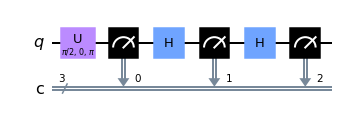

In [3]:
# example 1:
# measurement 1 and then measurement 2 acts on a quantum state.
# measurement 1 is a measurement in the X-basis.
# measurement 2 is a measurement in the Z-basis.


def example1_qc(p_s):
    qc = QuantumCircuit(1, 3)
    theta_s = calc_theta(p_s)
    qc.u(theta_s, 0, pi, 0)
    qc.measure(0, 0)
    qc.h(0)
    qc.measure(0, 1)
    qc.h(0)
    qc.measure(0, 2)
    return qc


def example1_calc_prob(p_s):
    qc = example1_qc(p_s)
    aer_sim = Aer.get_backend("aer_simulator")
    job = aer_sim.run(assemble(qc), shots=8192)
    result = job.result().get_counts()
    result1 = fill_result(result)
    return count_result(result1, "0**")


def example1_plot_prob(num):
    p_list = np.linspace(0, 1, num)
    v_list = [example1_calc_prob(p_s) for p_s in p_list]
    plt.plot(p_list, v_list)
    plt.ylim((0.4, 0.8))
    plt.ylabel("probability that output is 0")
    plt.xlabel("p")


qc = example1_qc(0.5)
qc.draw(output="mpl")


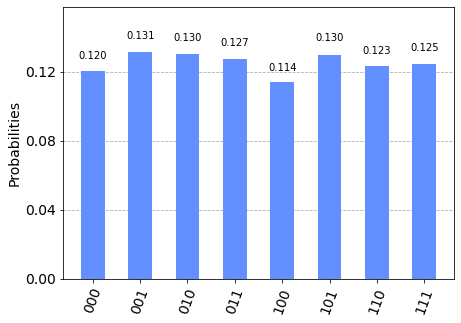

In [4]:
aer_sim = Aer.get_backend("aer_simulator")
job = aer_sim.run(assemble(qc), shots=4096)
result = job.result().get_counts()
plot_histogram(result)


In [5]:
result1 = fill_result(result)
print(f'prob(0)={count_result(result1, "0**")}')
print(f'prob(1)={count_result(result1, "1**")}')


prob(0)=0.5087890625
prob(1)=0.4912109375


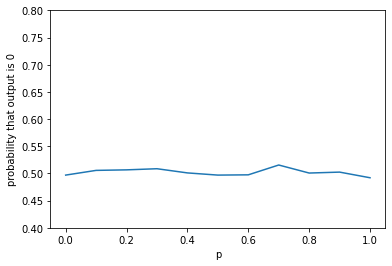

In [6]:
# the probability that the output is 0, is 50% without depending on the input state.
# the input state is sqrt(p)|0> + sqrt(1-p)|1>.
# information encoded in the input vanishes.
example1_plot_prob(11)


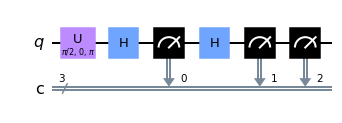

In [7]:
# example 2:
# measurement 2 and then measurement 1 acts on a quantum state.
# measurement 1 is a measurement in the X-basis.
# measurement 2 is a measurement in the Z-basis.


def example2_qc(p_s):
    qc = QuantumCircuit(1, 3)
    theta_s = calc_theta(p_s)
    qc.u(theta_s, 0, pi, 0)
    qc.h(0)
    qc.measure(0, 0)
    qc.h(0)
    qc.measure(0, 1)
    qc.measure(0, 2)
    return qc


def example2_calc_prob(p_s):
    qc = example2_qc(p_s)
    aer_sim = Aer.get_backend("aer_simulator")
    job = aer_sim.run(assemble(qc), shots=8192)
    result = job.result().get_counts()
    result1 = fill_result(result)
    return count_result(result1, "0**")


def example2_plot_prob(num):
    p_list = np.linspace(0, 1, num)
    v_list = [example2_calc_prob(p_s) for p_s in p_list]
    plt.plot(p_list, v_list)
    plt.ylim((0.4, 0.8))
    plt.ylabel("probability that output is 0")
    plt.xlabel("p")


qc = example2_qc(0.5)
qc.draw(output="mpl")


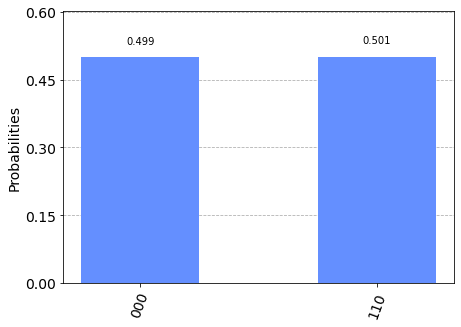

In [8]:
aer_sim = Aer.get_backend("aer_simulator")
job = aer_sim.run(assemble(qc))
result = job.result().get_counts()
plot_histogram(result)


In [9]:
result1 = fill_result(result)
print(f'prob(0)={count_result(result1, "0**")}')
print(f'prob(1)={count_result(result1, "1**")}')


prob(0)=0.4990234375
prob(1)=0.5009765625


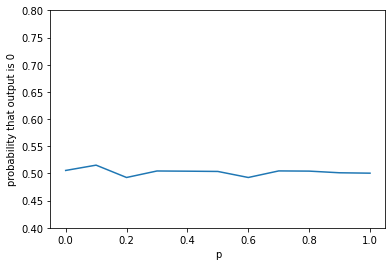

In [10]:
# the probability that the output is 0, is 50% without depending on the input state.
# information encoded in the input vanishes.
example2_plot_prob(11)


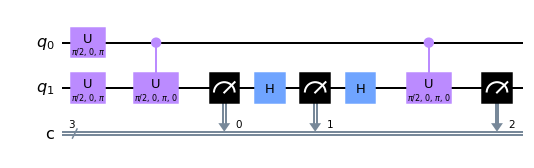

In [11]:
# example 3:
# processes superposed (example1 and example2) using a control qubit, act on  a quantum state.
# if control qubit = |0>, then measurement 1 and then measurement 2 acts on a quantum state.
# if control qubit = |1>, then measurement 2 and then measurement 1 acts on a quantum state.


def example3_qc(p_s):
    theta_c = calc_theta(0.5)
    theta_s = calc_theta(p_s)
    theta_cu = pi / 2
    qc = QuantumCircuit(2, 3)
    qc.u(theta_c, 0, pi, 0)
    qc.u(theta_s, 0, pi, 1)
    qc.cu(theta_cu, 0, pi, 0, 0, 1)
    qc.measure(1, 0)
    qc.h(1)
    qc.measure(1, 1)
    qc.h(1)
    qc.cu(theta_cu, 0, pi, 0, 0, 1)
    qc.measure(1, 2)
    return qc


def example3_calc_prob(p_s):
    qc = example3_qc(p_s)
    aer_sim = Aer.get_backend("aer_simulator")
    job = aer_sim.run(assemble(qc), shots=8192)
    result = job.result().get_counts()
    result1 = fill_result(result)
    val0 = result1["010"]
    val1 = result1["110"]
    result1["010"] = val1
    result1["110"] = val0
    return count_result(result1, "0**")


def example3_plot_prob(num):
    p_list = np.linspace(0, 1, num)
    v_list = [example3_calc_prob(p_s) for p_s in p_list]
    plt.plot(p_list, v_list)
    plt.ylim((0.4, 0.8))
    plt.ylabel("probability that output is 0")
    plt.xlabel("p")


qc = example3_qc(0.5)
qc.draw(output="mpl")


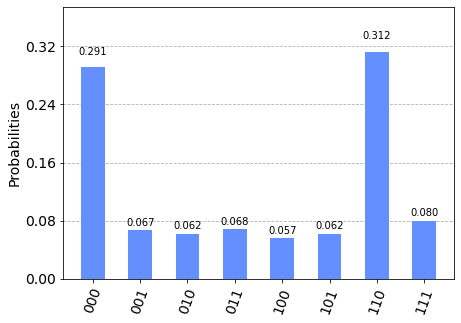

In [12]:
aer_sim = Aer.get_backend("aer_simulator")
job = aer_sim.run(assemble(qc))
result = job.result().get_counts()
plot_histogram(result)


In [13]:
result1 = fill_result(result)
# applying a NOT gate to q1 (qbit 1) if measurement 0 is 0 and measurement 1 is 1.
# (I'm looking for how to implement a control-NOT gate supporting a classical control bit.)
# insted of implementing it in quantum circuit, swapping prob("010") <-> prob("110").
val0 = result1["010"]
val1 = result1["110"]
result1["010"] = val1
result1["110"] = val0
print(f'prob(0)={count_result(result1, "0**")}') # probability that measurement 3 is 0
print(f'prob(1)={count_result(result1, "1**")}') # probability that measurement 3 is 1


prob(0)=0.73828125
prob(1)=0.26171875


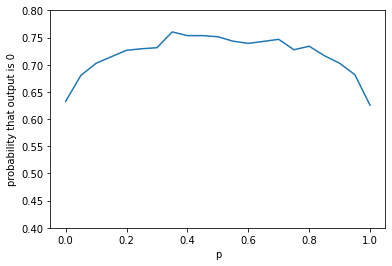

In [14]:
# the probability that the output is 0, depends on the input state.
# information encoded in the input remains in the output state.
# this is an effect of superposed measurement.
example3_plot_prob(21)
